<a href="https://colab.research.google.com/github/ulyazzh/capstone_bengkelkoding/blob/main/capstone/capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#membaca dataset
df = pd.read_csv('/content/ObesityDataSet.csv')

In [ ]:
#menampilkan dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
# menampilkan jumlah baris dan kolom
df.shape

(2111, 17)

In [ ]:
# deskripsi data
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


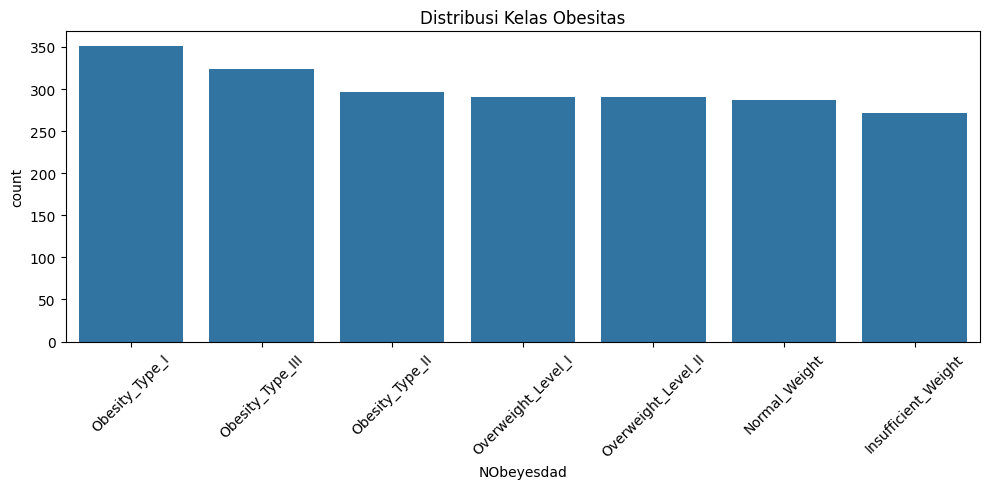

In [ ]:
#menampilkan visualisasi distribusi kelas obesitas
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Obesitas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

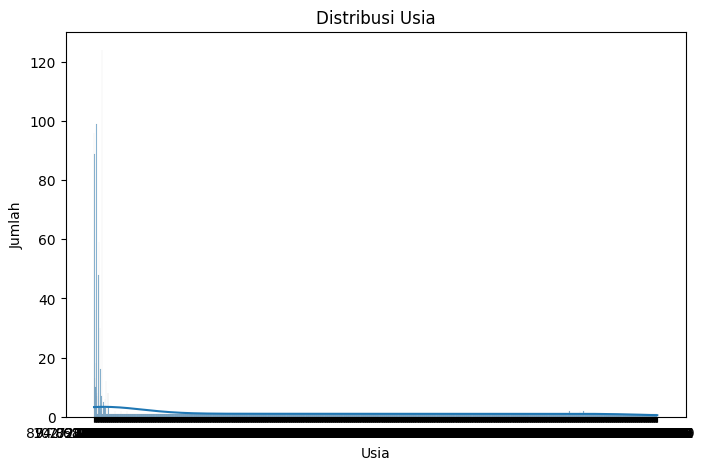

In [ ]:
#menampilkan distribusi usia
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()


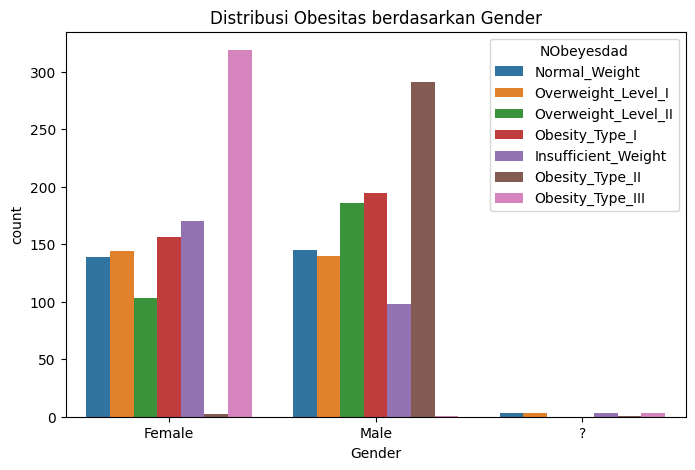

In [ ]:
# Visualisasi gender vs tingkat obesitas
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='NObeyesdad', data=df)
plt.title("Distribusi Obesitas berdasarkan Gender")
plt.show()

In [ ]:
#cek missing value
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [ ]:
#cek unique value
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [ ]:
#mengecek data duplikat
print(df.duplicated().sum())

18


In [ ]:
#Cek keseimbangan data (distribusi label target)
(df['NObeyesdad'].value_counts())


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


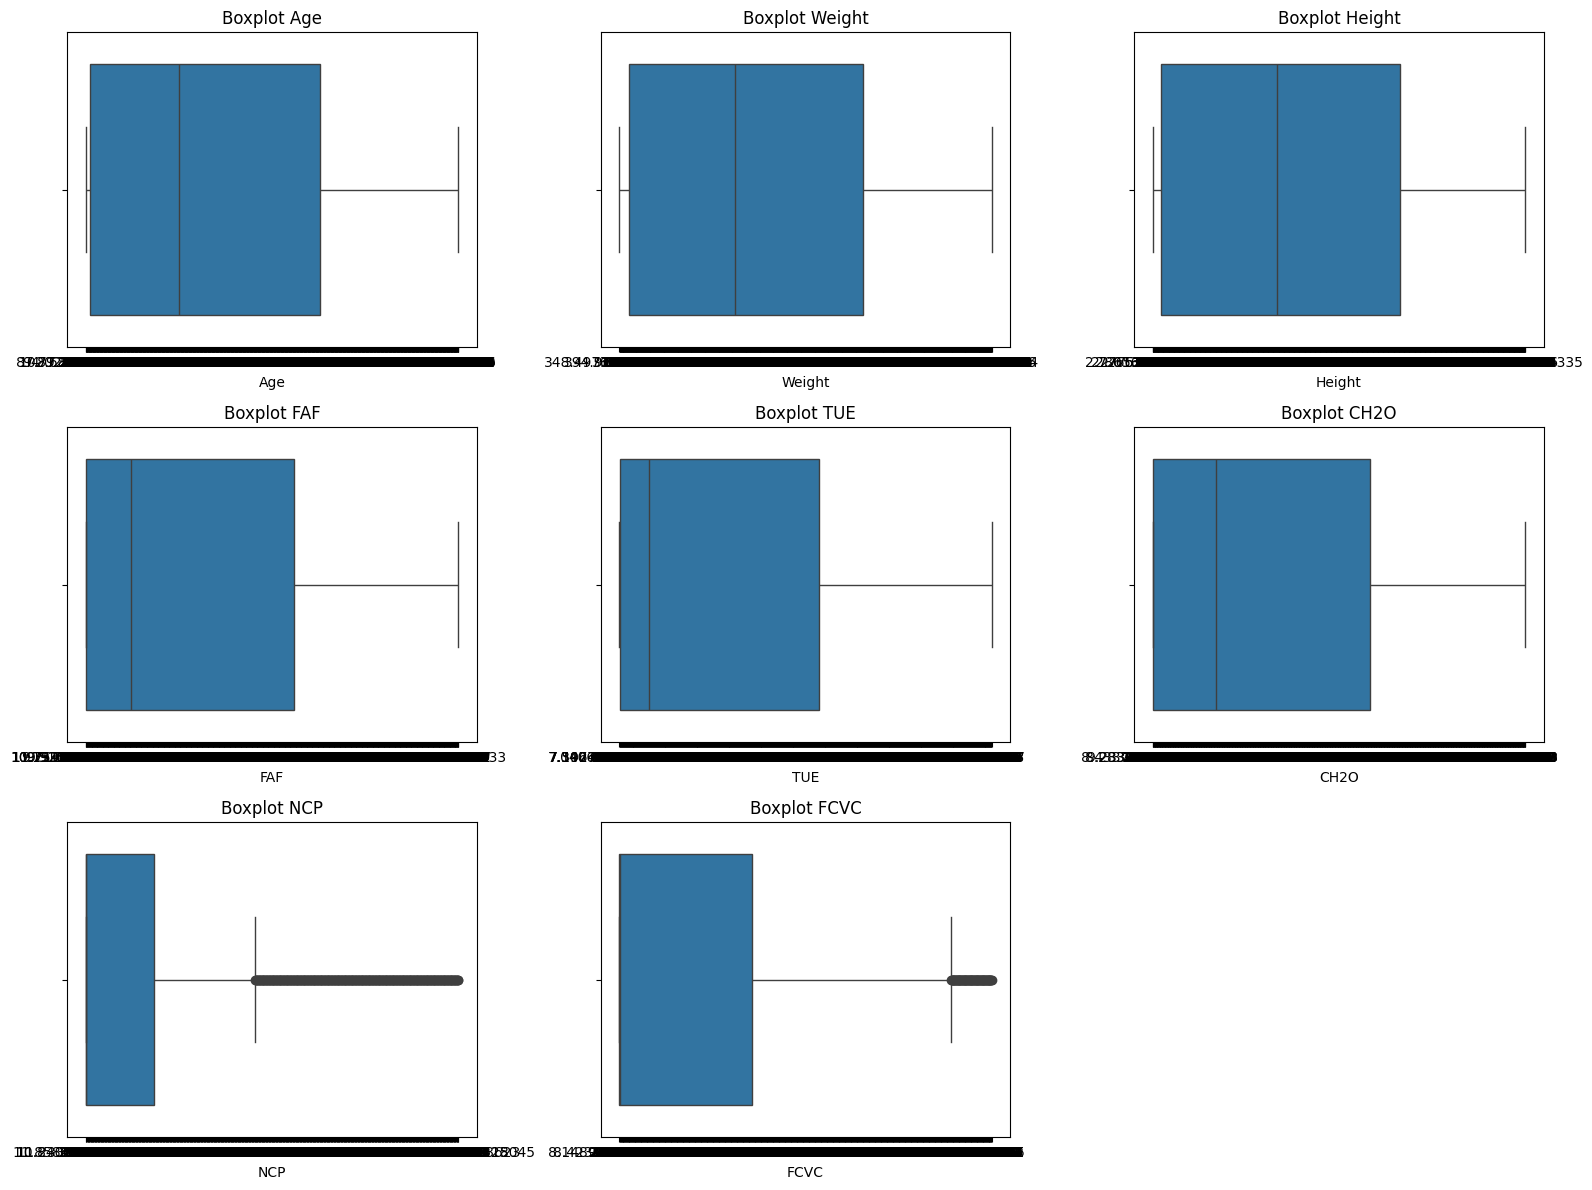

In [ ]:
#deteksi outlier dengan boxplot
numeric_cols = ['Age', 'Weight', 'Height', 'FAF', 'TUE', 'CH2O', 'NCP', 'FCVC']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.tight_layout()

plt.show()


# Kesimpulan
- dataset memiliki total 2111 baris dan 17 kolom.
- ditemukan missing values pada dataset.
- terdapat data duplikat
- distribusi kelas terlihat seimbang, walapun ada sedikit perbedaan antar kelas tapi tidak terlalu jauh
- fitur NCP dan FCVC terdeteksi memiliki outlier
